In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Solving the problem analytically.

The problem at hand is a finite square well such that
$V(x) = -V_0$ when $-a$ < $x$ < $a$ and $0$ otherwise. This can be seen by the following plot of the potential.

Text(5.1, -10, '$-V_0$')

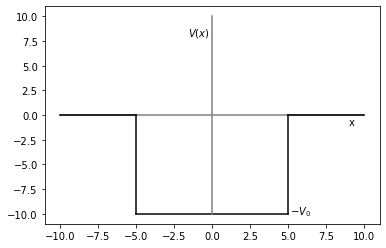

In [18]:
#Plot potential
plt.plot(np.linspace(-5,5,10),np.ones(10)*(-10),'k')
plt.plot(np.linspace(-10,10,10),np.zeros(10),'0.5')
plt.plot(np.zeros(10),np.linspace(-10,10,10),'0.5')
plt.plot(np.ones(10)*(-5),np.linspace(-10,0,10),'k')
plt.plot(np.ones(10)*(5),np.linspace(-10,0,10),'k')
plt.plot(np.linspace(-10,-5,10),np.zeros(10),'k')
plt.plot(np.linspace(5,10,10),np.zeros(10),'k')
plt.text(-1.6,8,'$V(x)$')
plt.text(9,-1,'x')
plt.text(5.1,-10,'$-V_0$')

Solving the Schrodinger equation, we get the wavefunction in the 3 regions as follows.
\begin{equation}
\psi_I = D e^{\beta x}
\end{equation}
$$\psi_{II} = A\cos(\alpha x) + B \sin (\alpha x)$$
$$\psi_{III} = F e^{-\beta x}$$
Here, $\beta$ = $\sqrt{\frac{-2mE}{\hbar^2}}$ and $\alpha$ = $\sqrt{\frac{2m(V_0+E)}{\hbar^2}}$\\
After applying the boundary conditions, we get two sets of solutions for even and odd parity which can be obtained by solvind the following equations.

# Even parity states

After applying the boundary conditions, we get,
$$De^{-\beta a} = A\cos(\alpha a) = Fe^{-\beta a}$$
$$D\beta e^{-\beta a} = A\alpha \sin(\alpha a) = F\beta e^{-\beta a}$$
From these two equaitons, we get $D=F$ and,
$$\alpha \sin(\alpha a) - \beta \cos(\alpha a) = 0$$
This equation needs to be solved in order to get the energy eigenstates which have even parity.

# Odd parity states

After applying the boundary conditions, we get,
$$De^{-\beta a} = -B\sin(\alpha a) = -Fe^{-\beta a}$$
$$D\beta e^{-\beta a} = B\alpha \cos(\alpha a) = -F\beta e^{-\beta a}$$
From these two equaitons, we get $D=-F$ and,
$$\beta \sin(\alpha a) + \alpha \cos(\alpha a) = 0$$
This equation needs to be solved in order to get the energy eigenstates which have odd parity.

Considering the mass of electron, we get the value of $\frac{2m}{\hbar^2}$ = 0.262 in units involving eV and angstrom. The problem will be solved for 2a = 10 angstrom and $V_0$ = 10eV

In [95]:
#defining beta and alpha.
def beta(E):
    return np.sqrt(-0.262*E)

def alpha(V_0,E):
    return np.sqrt(0.262*(V_0+E))

In [96]:
#defining the necessary equations to be solved.
def even_states(a,V_0,E):
    return alpha(V_0,E)*np.sin(alpha(V_0,E)*a) - beta(E)*np.cos(alpha(V_0,E)*a)

def odd_states(a,V_0,E):
    return beta(E)*np.sin(alpha(V_0,E)*a) + alpha(V_0,E)*np.cos(alpha(V_0,E)*a)

In [97]:
#Plotting the function (even)
def plot_even(a,V_0):
    x = np.linspace(-V_0,0,100)
    y=[]
    for i in x:
        y.append(even_states(a,V_0,i))
    plt.plot(x,y)
    plt.plot(x,np.zeros(100),'k')

In [98]:
#Plotting the function (odd)
def plot_odd(a,V_0):
    x = np.linspace(-V_0,0,100)
    y=[]
    for i in x:
        y.append(odd_states(a,V_0,i))
    plt.plot(x,y)
    plt.plot(x,np.zeros(100),'k')

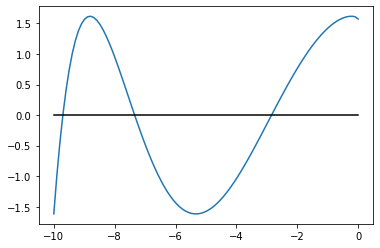

In [99]:
plot_even(5,10)

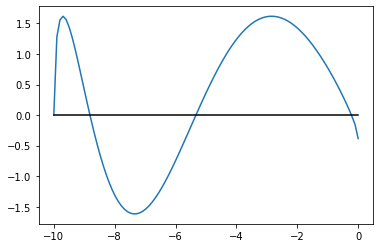

In [100]:
plot_odd(5,10)

From the above plots, it is clear that there are total 6 bound states for the problem. The trivial E = -10eV solution is neglected as it gives no wavefunction.

These plots are only for the initial conditions 2a = 10A and height = 10eV. In order to find the ranges of the roots for any initial condition, the range finding algorithm made in the first classwork is used but instead of using integer ranges, ranges of arbitrary size of our choice are used in order to account for the fact that there can be more than one roots in a partcular interval. Hence, the size of the intervals are shortened. Using the following code for finding the range, we can find the solution for any initial condition provided the conditions are not far off in order from the given ones.

In [26]:
def root_range(func,a,V_0):
    #the root range somewhat behaves like this with a.
    ran = np.linspace(-V_0,0,a*10*V_0+1)
    
    Energy_levels=[]
    ranges=[]
    for i in range(len(ran)-1):
        if (func(a,V_0,ran[i]) == 0):
            Energy_levels.append(ran[i])
        if (func(a,V_0,ran[i+1]) == 0):
            Energy_levels.append(ran[i+1])
        if (func(a,V_0,ran[i])*func(a,V_0,ran[i+1]) < 0):
            ranges.append([ran[i],ran[i+1]])
        
            
    return [ranges,Energy_levels]

In [27]:
root_range(even_states,5,10)

[[[-9.72, -9.7], [-7.359999999999999, -7.34], [-2.8599999999999994, -2.84]],
 []]

In [28]:
#This is a bisection code to find all the solutions.
def bisection(func,a,V_0,tol):
    roots=[]
    for i in root_range(func,a,V_0)[0]:
        r1 = i[0]
        r2 = i[1]
        c=(r1+r2)/2
        
        while (True):
            if (func(a,V_0,r1)*func(a,V_0,r2) > 0):
                print ('please give a corrrect range')
                break
            else:
                c=(r1+r2)/2
                temp_f = func(a,V_0,c)
                if (np.abs(temp_f) < tol): #tolerace is automatically set by the program
                    res = c
                    roots.append(res)
                    break
                else:
                    if (temp_f*func(a,V_0,r2) < 0):
                        r1=c
                    elif (temp_f*func(a,V_0,r1) < 0):
                        r2=c
            
        
    return roots

In [29]:
#This code finds all the eigenvalues.
Energy_levels = bisection(odd_states,5,10,0.0000000000001)+bisection(even_states,5,10,0.0000000000001)

In [30]:
Energy_levels = np.sort(np.array(Energy_levels))

# Energy eigenvalues

In [32]:
#This includes both even and odd states.
Energy_levels

array([-9.70192558, -8.81186049, -7.34398936, -5.32982086, -2.84506241,
       -0.2211095 ])

In [33]:
#These variables differentiate the even and odd states
even_levels = np.array(bisection(even_states,5,10,0.0000000000001))
odd_levels = np.array(bisection(odd_states,5,10,0.0000000000001))

# Wavefunctions

In order to find the wavefunctions we have to use the boundary condition equations and then normalise in order to find the values of A,B,C,D,F. We have to use the bisection code again.

For even states, from the formula given above, we have
$$D = Ae^{\beta a}\cos{\alpha a}$$
After normalising the wavefunction analytically, we get,
$$\frac{D^2}{\beta}e^{2\beta a}+A^2a+\frac{A^2}{2\alpha}\sin(2\alpha a)$$
By solving the above equation, we can get the wavefunction for the even states.


For odd states, from the formula given above, we have
$$D = -Be^{\beta a}\sin{\alpha a}$$
After normalising the wavefunction analytically, we get,
$$\frac{D^2}{\beta}e^{2\beta a}+B^2a-\frac{B^2}{2\alpha}\sin(2\alpha a)$$
By solving the above equation, we can get the wavefunction for the odd states.

# Even states

In [68]:
#beta and alpha
a1=[]
b1=[]
for i in range(len(even_levels)):
    a1.append(alpha(10,even_levels[i]))
    b1.append(beta(even_levels[i]))
a1=np.array(a1)
b1=np.array(b1)
#There are 3 different energy levels. These array contains all the values of alpha and beta

In [69]:
def norm_even(a,A,ind):
    D = A*np.e**(b1[ind]*a)*np.cos(a1[ind]*a)
    return (D**2/b1[ind])*np.e**(-2*b1[ind]*a)+(A**2)*a+(A**2/(2*a1[ind]))*np.sin(2*a1[ind]*a)-1


def bisection_norm(func,a,ind,tol):
    ap=0
    bp=1
    while (1==1):
        if (func(a,ap,ind)*func(a,bp,ind) > 0):
            print ('please give a corrrect range')
            break
        else:
            c=(ap+bp)/2
            temp_f = func(a,c,ind)
            if (np.abs(temp_f) < tol): 
                res = c
                break
            else:
                if (temp_f*func(a,bp,ind) < 0):
                    ap=c
                elif (temp_f*func(a,ap,ind) < 0):
                    bp=c
    if (func(a,ap,ind)*func(a,bp,ind) < 0):
        return res

In [70]:
#To find the value of A using bisection method.
A=[]
for i in range(len(even_levels)):
    A.append(bisection_norm(norm_even,5,i,0.000000000000001))
A=np.array(A)
D=A*(np.e**(b1*5))*np.cos(a1*5)

In [71]:
D

array([ 210.89686494, -221.56097301,   25.54797752])

In [72]:
#wavefunction definition
def psi1(x,ind):
    return D[ind]*np.e**(b1[ind]*x)

def psi2(x,ind):
    return A[ind]*np.cos(a1[ind]*x)

def psi3(x,ind):
    return D[ind]*np.e**(-b1[ind]*x)

In [73]:
#plotting the wavefunction
def evenfunction(ind):
    x1=np.linspace(-10,-5,50)
    x2=np.linspace(-5,5,50)
    x3=np.linspace(5,10,50)
    y1=[]
    y2=[]
    y3=[]
    for i in x1:
        y1.append(psi1(i,ind))
    for j in x2:
        y2.append(psi2(j,ind))
    for k in x3:
        y3.append(psi3(k,ind))
    plt.plot(x1,y1,'k')
    plt.plot(x2,y2,'k')
    plt.plot(x3,y3,'k')
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$ even')
    return even_levels[ind]

-9.70192557746239

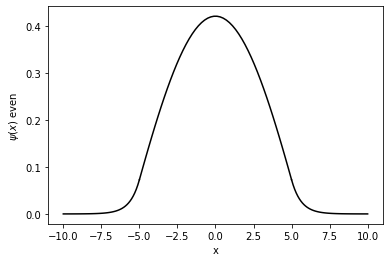

In [74]:
#This plots the wavefunction and gives the eigenvalue in units of eV.
evenfunction(0)

-7.343989360570703

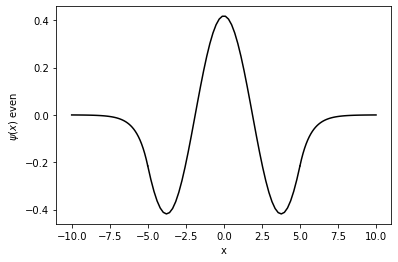

In [75]:
evenfunction(1)

-2.8450624073395736

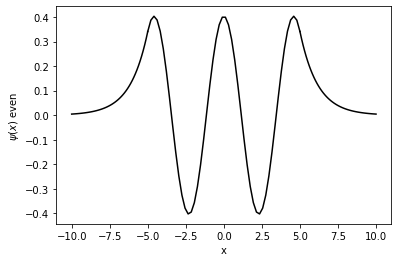

In [76]:
evenfunction(2)

# Odd states

In [77]:
#beta and alpha
a2=[]
b2=[]
for i in range(len(odd_levels)):
    a2.append(alpha(10,odd_levels[i]))
    b2.append(beta(odd_levels[i]))
a2=np.array(a2)
b2=np.array(b2)
#There are 3 different energy levels. These array contains all the values of alpha and beta

In [78]:
def norm_odd(a,B,ind):
    D = -B*np.e**(b2[ind]*a)*np.sin(a2[ind]*a)
    return (D**2/b2[ind])*np.e**(-2*b2[ind]*a)+(B**2)*a-(B**2/(2*a2[ind]))*np.sin(2*a2[ind]*a)-1

In [79]:
#To find the value of A using bisection method.
B=[]
for i in range(len(even_levels)):
    B.append(bisection_norm(norm_even,5,i,0.000000000000001))
B=np.array(B)
D=-B*np.e**(b2*5)*np.sin(a2*5)

In [80]:
D

array([-289.54468399,  105.1868229 ,   -1.32758785])

In [81]:
#wavefunction definition (odd)
def psi1o(x,ind):
    return D[ind]*np.e**(b2[ind]*x)

def psi2o(x,ind):
    return B[ind]*np.sin(a2[ind]*x)

def psi3o(x,ind):
    return -D[ind]*np.e**(-b2[ind]*x)

In [84]:
#plotting the wavefunction
def oddfunction(ind):
    x1=np.linspace(-10,-5,50)
    x2=np.linspace(-5,5,50)
    x3=np.linspace(5,10,50)
    y1=[]
    y2=[]
    y3=[]
    for i in x1:
        y1.append(psi1o(i,ind))
    for j in x2:
        y2.append(psi2o(j,ind))
    for k in x3:
        y3.append(psi3o(k,ind))
    plt.plot(x1,y1,'k')
    plt.plot(x2,y2,'k')
    plt.plot(x3,y3,'k')
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$ odd')
    return odd_levels[ind]

-8.811860492125783

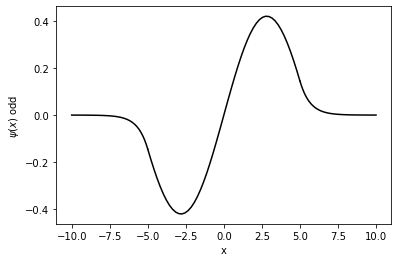

In [85]:
oddfunction(0)

-5.329820859075264

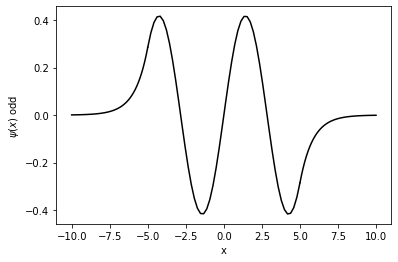

In [87]:
oddfunction(1)

-0.22110950074551575

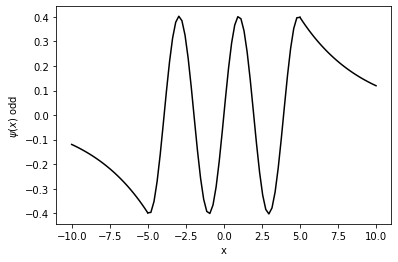

In [88]:
oddfunction(2)